Exploring different methods such as data visualization and normalized vegetation, water, and geogloy indices to analyze Sundarbans satellite data using python.

In [18]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as ggo
from matplotlib.colors import ListedColormap

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## Read the Data
We shall read the 12 bands using rasterio and stack them into an n-dimansional array using numpy.stack() method.

In [25]:
s_sentinel_bands = glob("/Users/aleksandrak/Desktop/Satellite_Imagery_Analysis/data/*B?*.tiff")
s_sentinel_bands.sort()

arr = []

for i in s_sentinel_bands:
    with rio.open(i, 'r') as f:
        arr.append(f.read(1))

arr_st = np.stack(arr)
arr_st.shape

(12, 954, 298)

## Visualize Bands
We visualize each band using the EartPy package.
plot_bands() method takes the stack of the bands and plots along with custom titles which can be done by passing unique titles for each image as a list of titles using the title= parameter.

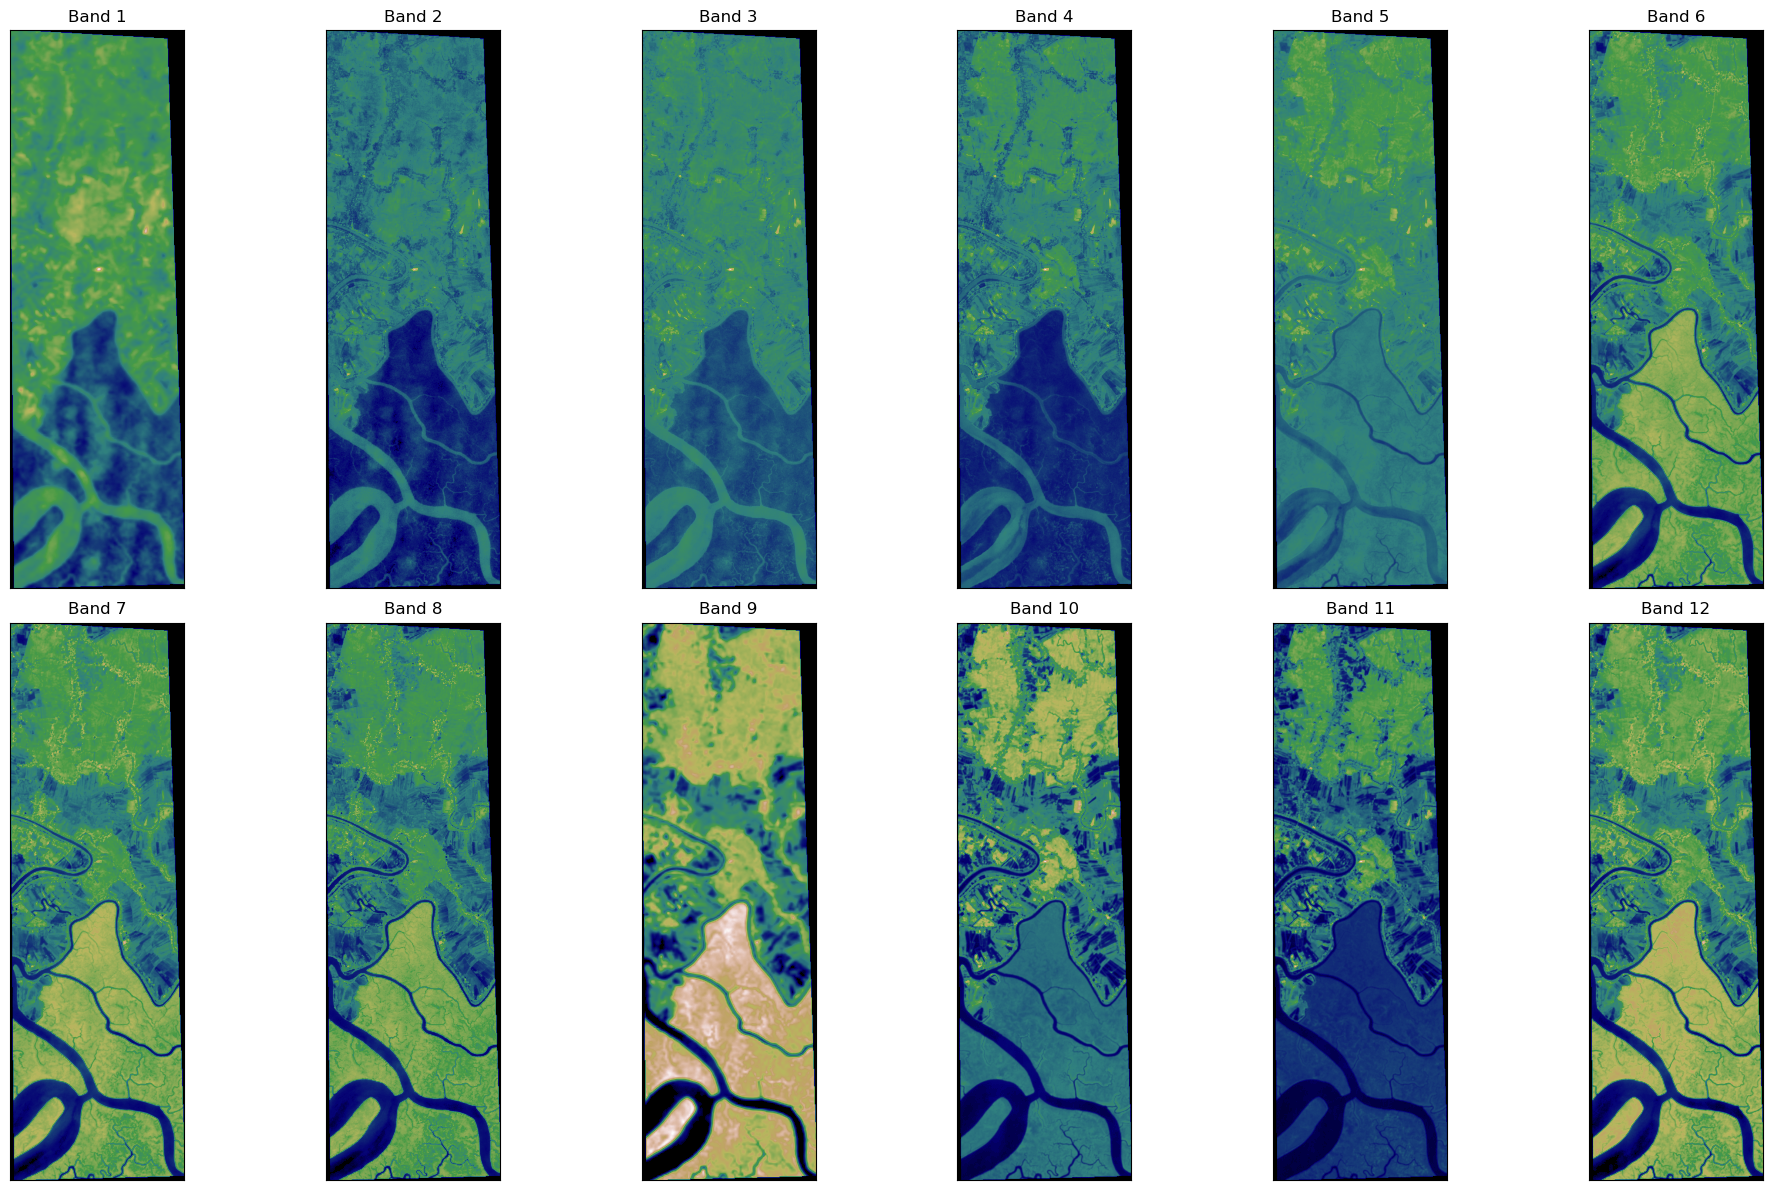

In [30]:
ep.plot_bands(arr_st, 
              cmap='gist_earth',
              figsize=(20, 12),
              cols=6,
              cbar=False)
plt.show()

## RGB Composite Image
These data has multiple numer of bands that contain the data ranging from visible to infrared. So it is hard to visualize the data for humans. By creating an RGB Composite Image makes it easier to understand the data effectively. To plot RGB composite images, we will plot the red, green, and blue bands, which are bands 4, 3, and 2, respectively. 
The Composite images that we created can sometimes be dark if the pixel brightness values are skewed toward the value of zero. This type of problem can be solved by stretching the pixel brightness values in an image using the argument stretch=True to extend the values to the full 0-255 range of potential values to increase the visual contrast of the image. Also, the str_clip argument allows you to specify how much of the tails of the data that you want to clip off. The larger the number, the more the data will be stretched or brightened.

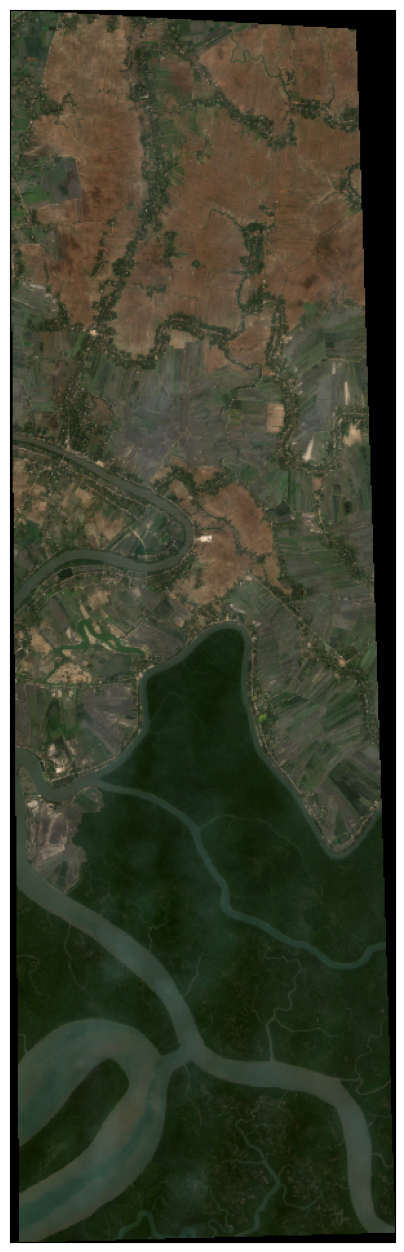

In [32]:
# RGB composite image
rgb = ep.plot_rgb(arr_st,
                 rgb=(3, 2, 1),
                  figsize=(10, 16))
plt.show()

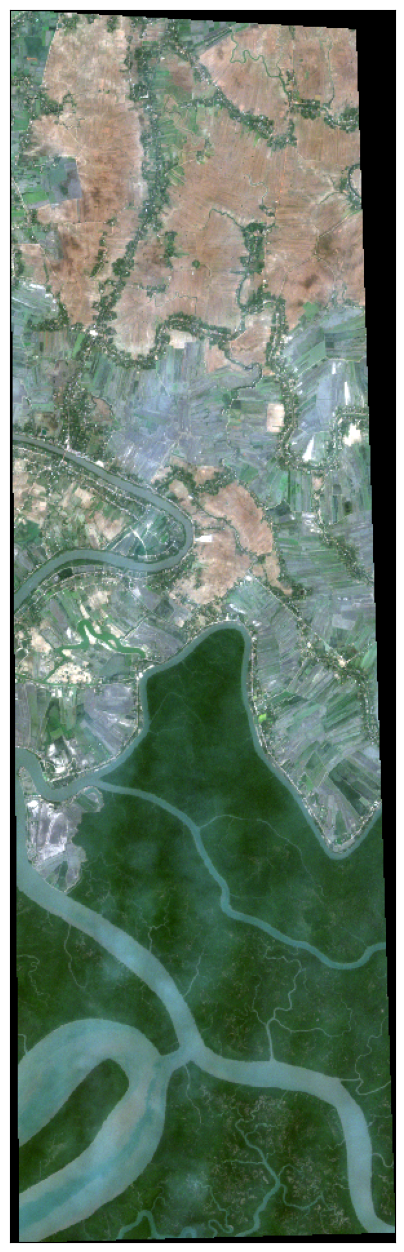

In [34]:
# RGB Composite image with stretch
ep.plot_rgb(arr_st,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

## Histograms
Visualizing the bands of the hyperspectral image dataset helps us to understand the distribution of pixels/values of the bands. The hist method from the earhtpy.plot does the work by plotting the histograms for the bands of the dataset/stack that we created previously. We can also modify the column size, titles, colors of the individual histograms.

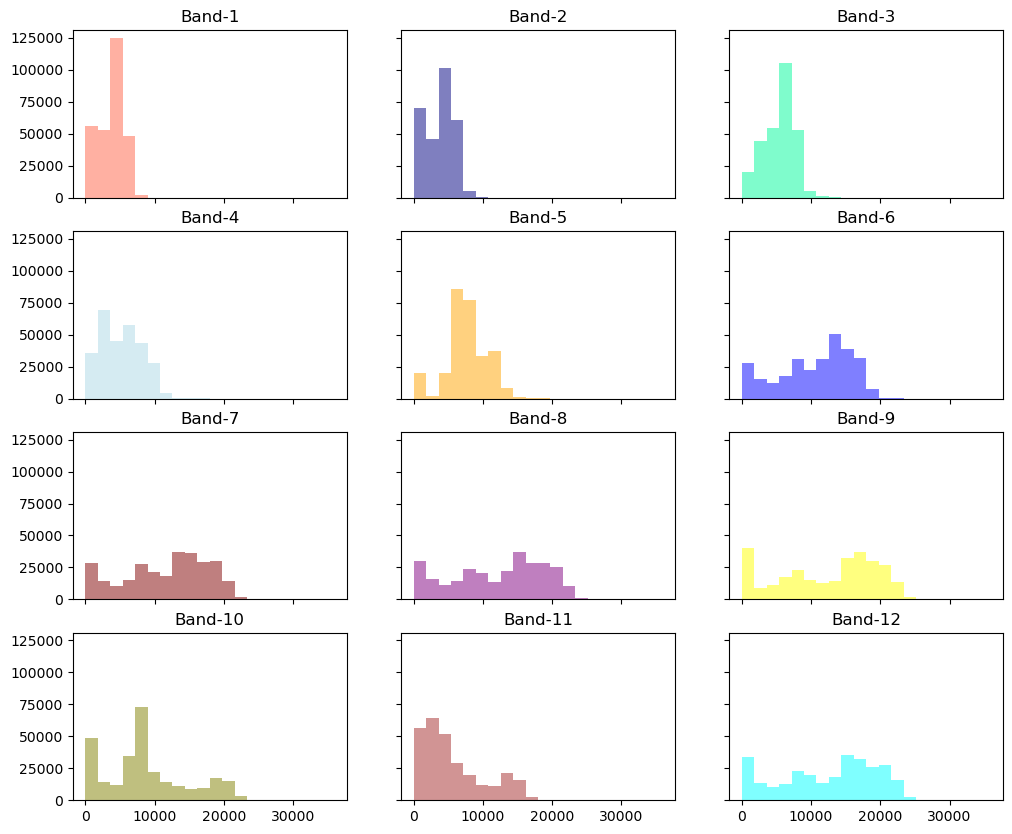

In [46]:
colours = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st,
        colors=colours,
        title=[f'Band-{i}' for i in range(1, 13)],
        cols=3,
        alpha=0.5,
        figsize=(12, 10))
plt.show()

## Vegetation and Soil Indices
Normalized Satellite indices are images that are computed from Multi-Spectral satellite images. These images emphasize a specific phenomenon that is present while mitigating other factors that degrade the effects in the image. For instance, a vegetation index will show healthy vegetation as bright in the index image, while unhealthy vegetation has lower values and barren terrain is dark. Since shading from terrain variation (hills and valleys) affect the intensity of images, the indices are created in ways that the color of an object is emphasized rather than the intensity or brightness of the object.
### Normalized Difference Vegetation Index (NDVI)
To determine the density of green on a patch of land, researchers must observe the distinct colors (wavelengths) of visible(VIS) and near-infrared (NIR)sunlight reflected by the plants. The Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared which vegetation strongly reflects and red light (which vegetation absorbs). NDVI always ranges from -1 to +1.

NDVI = ((NIR - Red) / (NIR + Red))

For example, when you have negative values, it’s likely water. On the other hand, if you have an NDVI value close to +1, there’s a high possibility that it’s dense green leaves. But when NDVI is close to zero, there aren’t green leaves and it could even be an urbanized area.

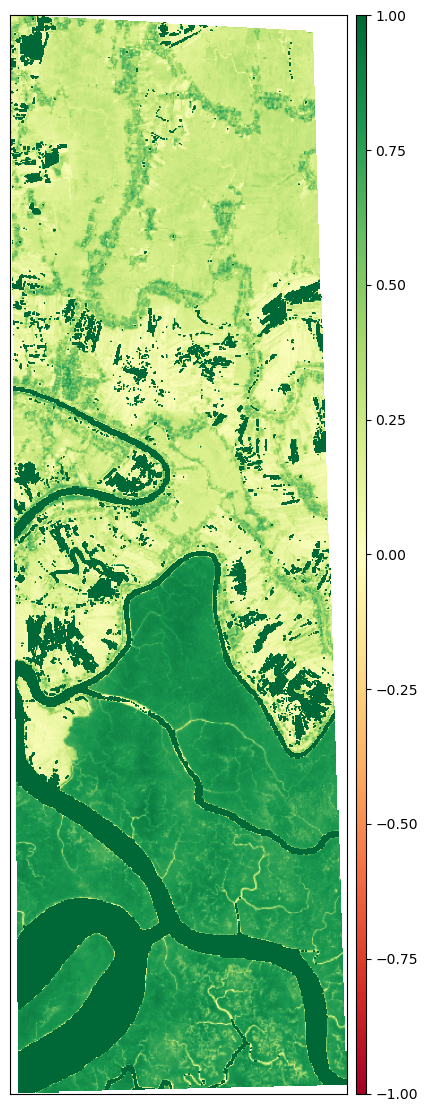

In [49]:
ndvi = es.normalized_diff(arr_st[7], arr_st[3])
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

### Soil Adjusted Vegetation Index (SAVI)

The Soil-Adjusted Vegetation Index (SAVI) is a vegetation index that attempts to minimize soil brightness influences using a soil-brightness correction factor. This is often used in arid regions where vegetative cover is low.

SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)

The L value varies depending on the amount of green vegetative cover. Generally, in areas with no green vegetation cover, L=1; in areas of moderate green vegetative cover, L=0.5; and in areas with very high vegetation cover, L=0 (which is equivalent to the NDVI method). This index outputs values between -1.0 and 1.0. 

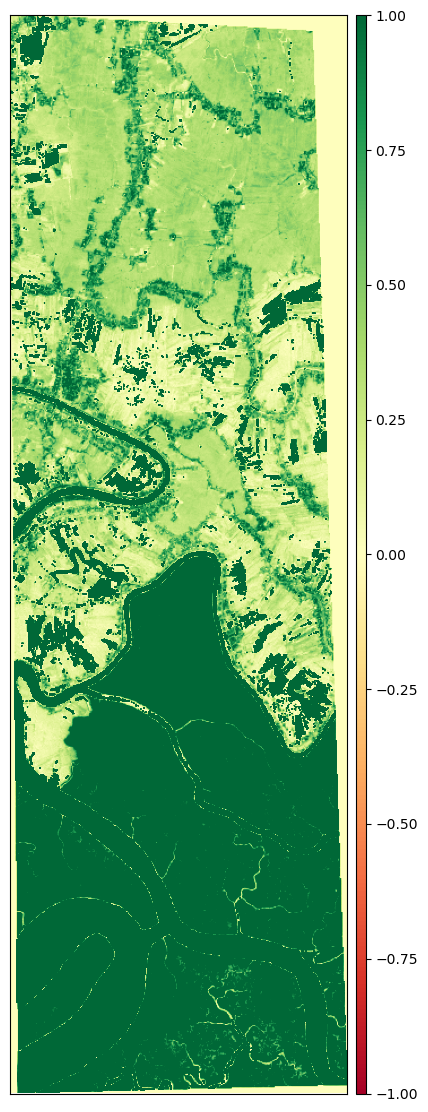

In [53]:
L = 0.5
savi = ((arr_st[7] - arr_st[3]) / (arr_st[7] + arr_st[3] + L)) * (1 + L)
ep.plot_bands(savi, 
              cmap="RdYlGn", 
              cols=1, 
              vmin=-1, 
              vmax=1, 
              figsize=(10, 14))
plt.show()

### Visible Atmospherically Resistant Index (VARI)

The Visible Atmospherically Resistant Index (VARI) is designed to emphasize vegetation in the visible portion of the spectrum while mitigating illumination differences and atmospheric effects. It is ideal for RGB or color images; it utilizes all three color bands.

VARI = (Green - Red)/ (Green + Red - Blue)

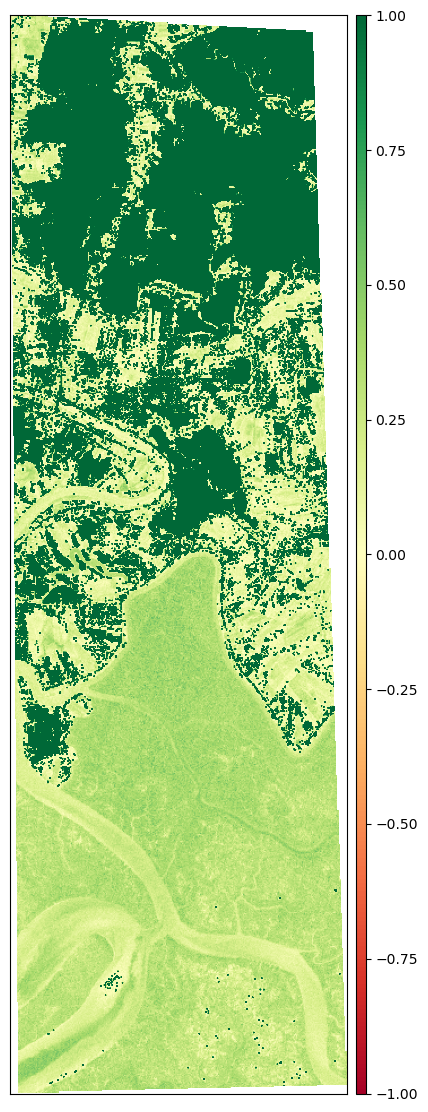

In [57]:
vari = (arr_st[2] - arr_st[3])/ (arr_st[2] + arr_st[3] - arr_st[1])

ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Water Indices

Surface water change is a very important indicator of environmental, climatic, and anthropogenic activities. Remote sensors, such as sentinel-2, Landsat, have been providing data for the last four decades, which are useful for extracting land cover types such as forest and water. Researchers have proposed many surface water extraction techniques, among which index-based methods are popular owing to their simplicity and cost-effectiveness.

### Modified Normalized Difference Water Index (MNDWI)

The Modified Normalized Difference Water Index (MNDWI) uses green and SWIR bands for the enhancement of open water features. It also diminishes built-up area features that are often correlated with open water in other indices.

MNDWI = (Green - SWIR) / (Green + SWIR)

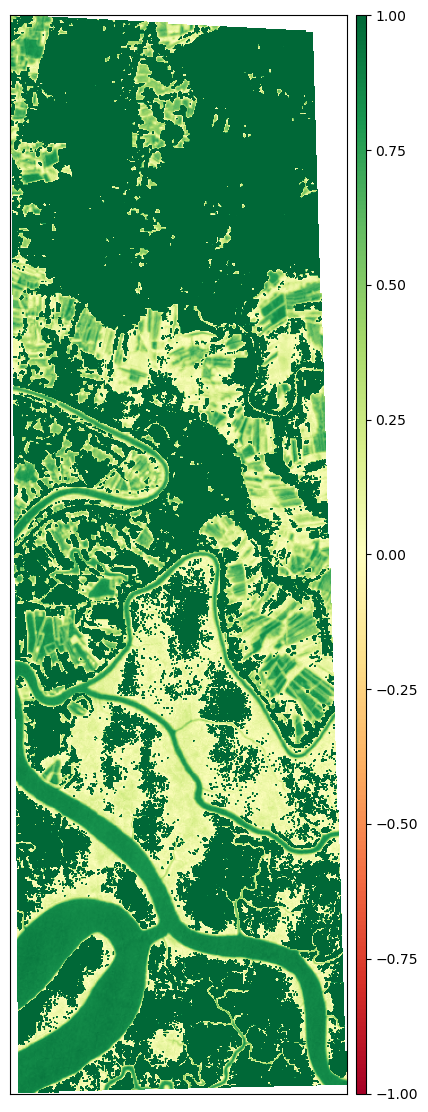

In [63]:
mndwi = mndwi = es.normalized_diff(arr_st[2], arr_st[10])

ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

### Normalized Difference Moisture Index (NDMI)

The Normalized Difference Moisture Index (NDMI) is sensitive to the moisture levels in vegetation. It is used to monitor droughts as well as monitor fuel levels in fire-prone areas. It uses NIR and SWIR bands to create a ratio designed to mitigate illumination and atmospheric effects.

NDMI = (NIR - SWIR1)/(NIR + SWIR1)

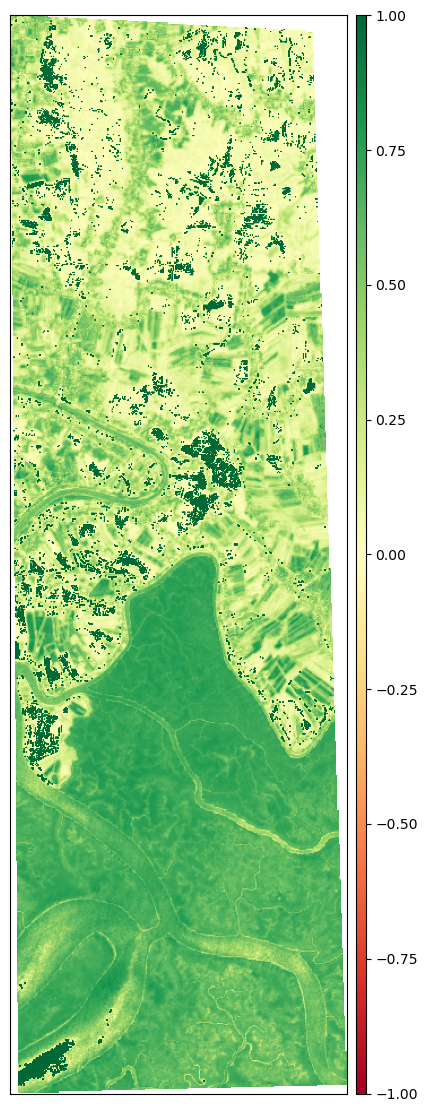

In [66]:
ndmi = es.normalized_diff(arr_st[7], arr_st[10])

ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Geology Indices

Satellite imagery and aerial photography have proven to be important tools in support of mineral exploration projects. They can be used in a variety of ways. Firstly they provide geologists and field crews the location of tracks, roads, fences, and inhabited areas.

### Clay Minerals

The clay ratio is a ratio of the SWIR1 and SWIR2 bands. This ratio leverages the fact that hydrous minerals such as clays, alunite absorb radiation in the 2.0–2.3 micron portion of the spectrum. This index mitigates illumination changes due to terrain since it is a ratio.

Clay Minerals Ratio = SWIR1 / SWIR2

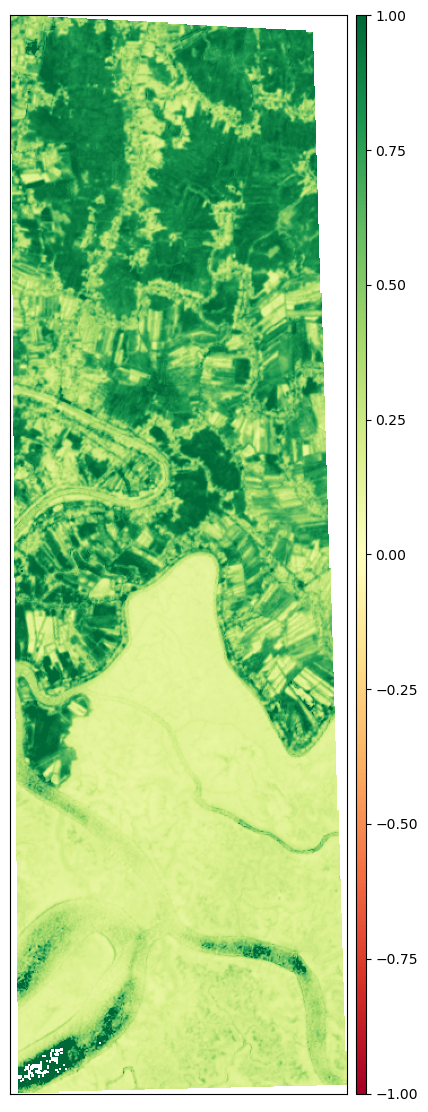

In [70]:
cmr = np.divide(arr_st[10], arr_st[11])
ep.plot_bands(cmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

### Ferrous Minerals

The ferrous minerals ratio highlights iron-bearing materials. It uses the ratio between the SWIR band and the NIR band.

Ferrous Minerals Ratio = SWIR / NIR

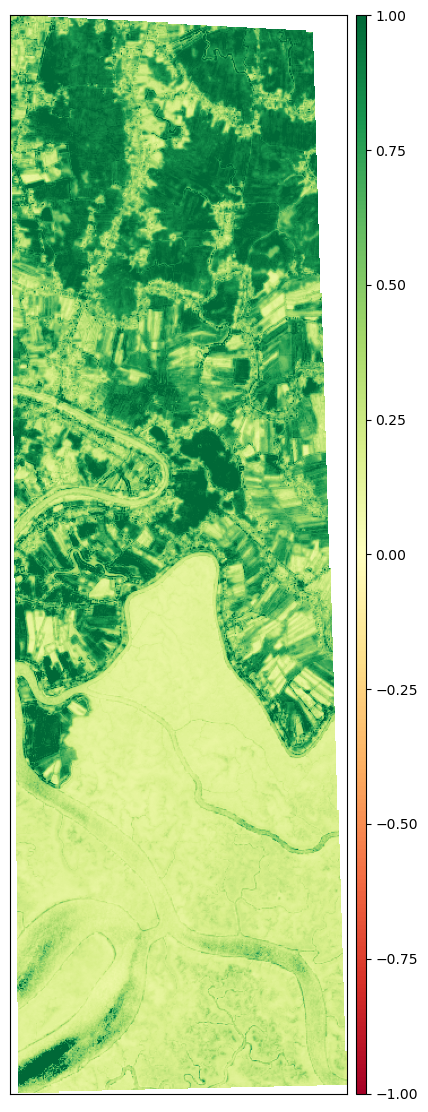

In [73]:
fmr = np.divide(arr_st[10], arr_st[7])
ep.plot_bands(fmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()